##############################
# Telco Customer Churn Feature Engineering

Problem : Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.
Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

##############################


In [1]:
#########################
# Veri Seti Hikayesi

# Telco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye,
# ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. 
# Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

# Değişkenler;

# CustomerId       : Müşteri İd’si
# Gender           : Cinsiyet
# SeniorCitizen    : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner          : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents       : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure           : Müşterinin şirkette kaldığı ay sayısı
# PhoneService     : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines    : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService  : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity   : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup     : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport      : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV      : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) 
#                    Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için 
#                    İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies  : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) 
#                    Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için 
#                    İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract         : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod    : Müşterinin ödeme yöntemi 
#                    (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges   : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges     : Müşteriden tahsil edilen toplam tutar
# Churn            : Müşterinin kullanıp kullanmadığı (Evet veya Hayır)
#                    Geçen ay veya çeyreklik içerisinde ayrılan müşteriler



# Her satır benzersiz bir müşteriyi temsil etmekte.
# Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.

# Müşterilerin kaydolduğu hizmetler - 
#           phone, multiple lines, internet, online security, online backup, 
#           device protection, tech support, and streaming TV and movies

# Müşteri hesap bilgileri – 
#           ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, 
#           aylık ücretler ve toplam ücretler

# Müşteriler hakkında demografik bilgiler - 
#           cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı


In [2]:
# To do list;

# GÖREV 1: KEŞİFCİ VERİ ANALİZİ
           # Adım 1: Genel resmi inceleyiniz.
           # Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
           # Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.
           # Adım 4: Hedef değişken analizi yapınız. 
           #         (Kategorik değişkenlere göre hedef değişkenin ortalaması, 
           #         hedef değişkene göre numerik değişkenlerin ortalaması)
           # Adım 5: Aykırı gözlem analizi yapınız.
           # Adım 6: Eksik gözlem analizi yapınız.
           # Adım 7: Korelasyon analizi yapınız.

# GÖREV 2: FEATURE ENGINEERING
           # Adım 1:  Eksik ve aykırı değerler için gerekli işlemleri yapınız.
           # işlemleri uygulayabilirsiniz.
           # Adım 2: Yeni değişkenler oluşturunuz.
           # Adım 3:  Encoding işlemlerini gerçekleştiriniz.
           # Adım 4: Numerik değişkenler için standartlaştırma yapınız.
           # Adım 5: Model oluşturunuz.

In [3]:
# Kütüphane ve fonksiyonlarımızı import edelim;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings

import et_analysis as et

In [4]:
# Gerekli pandas ve warnings ayarlamalarını yapalım;
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Verimizi okutalım;
df = pd.read_csv("datasets/Telco-Customer-Churn.csv")

# Verimize hızlı bir bakış atalım;
et.check_df(df, display_=True)

##################### Shape #####################
(7043, 21)
##################### Types #####################


,DataType
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


##################### Head #####################


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


##################### Tail #####################


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


##################### NA #####################


,# of N/A value
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##################### Quantiles #####################


,0.000,0.010,0.050,0.250,0.500,0.750,0.950,0.990,1.000
SeniorCitizen,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
tenure,0.000,1.000,1.000,9.000,29.000,55.000,72.000,72.000,72.000
MonthlyCharges,18.250,19.200,19.650,35.500,70.350,89.850,107.400,114.730,118.750


In [6]:
# Verinin değişkenlerini inceleyelim;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# TotalCharges değişkeni object olarak gözüküyor, sayısal bir değişken haline getirelim;
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Churn değişkenini de encode edelim;
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

#### Görev 1:

In [8]:
# Numerik ve kategorik değişkenleri yakalayalım;

cat_cols, num_cols, cat_but_car, num_but_cat = et.grab_col_names(df, var_name=True, var_num=True)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


########## cat_cols ##########
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn']
########## num_cols ##########
['tenure', 'MonthlyCharges', 'TotalCharges']
########## cat_but_car ##########
['customerID']
########## num_but_cat ##########
['SeniorCitizen', 'Churn']




,gender,Ratio
Male,3555,50.476
Female,3488,49.524


'##########################################'

,Partner,Ratio
No,3641,51.697
Yes,3402,48.303


'##########################################'

,Dependents,Ratio
No,4933,70.041
Yes,2110,29.959


'##########################################'

,PhoneService,Ratio
Yes,6361,90.317
No,682,9.683


'##########################################'

,MultipleLines,Ratio
No,3390,48.133
Yes,2971,42.184
No phone service,682,9.683


'##########################################'

,InternetService,Ratio
Fiber optic,3096,43.959
DSL,2421,34.375
No,1526,21.667


'##########################################'

,OnlineSecurity,Ratio
No,3498,49.666
Yes,2019,28.667
No internet service,1526,21.667


'##########################################'

,OnlineBackup,Ratio
No,3088,43.845
Yes,2429,34.488
No internet service,1526,21.667


'##########################################'

,DeviceProtection,Ratio
No,3095,43.944
Yes,2422,34.389
No internet service,1526,21.667


'##########################################'

,TechSupport,Ratio
No,3473,49.311
Yes,2044,29.022
No internet service,1526,21.667


'##########################################'

,StreamingTV,Ratio
No,2810,39.898
Yes,2707,38.435
No internet service,1526,21.667


'##########################################'

,StreamingMovies,Ratio
No,2785,39.543
Yes,2732,38.790
No internet service,1526,21.667


'##########################################'

,Contract,Ratio
Month-to-month,3875,55.019
Two year,1695,24.066
One year,1473,20.914


'##########################################'

,PaperlessBilling,Ratio
Yes,4171,59.222
No,2872,40.778


'##########################################'

,PaymentMethod,Ratio
Electronic check,2365,33.579
Mailed check,1612,22.888
Bank transfer (automatic),1544,21.922
Credit card (automatic),1522,21.610


'##########################################'

,SeniorCitizen,Ratio
0,5901,83.785
1,1142,16.215


'##########################################'

,Churn,Ratio
0,5174,73.463
1,1869,26.537


'##########################################'

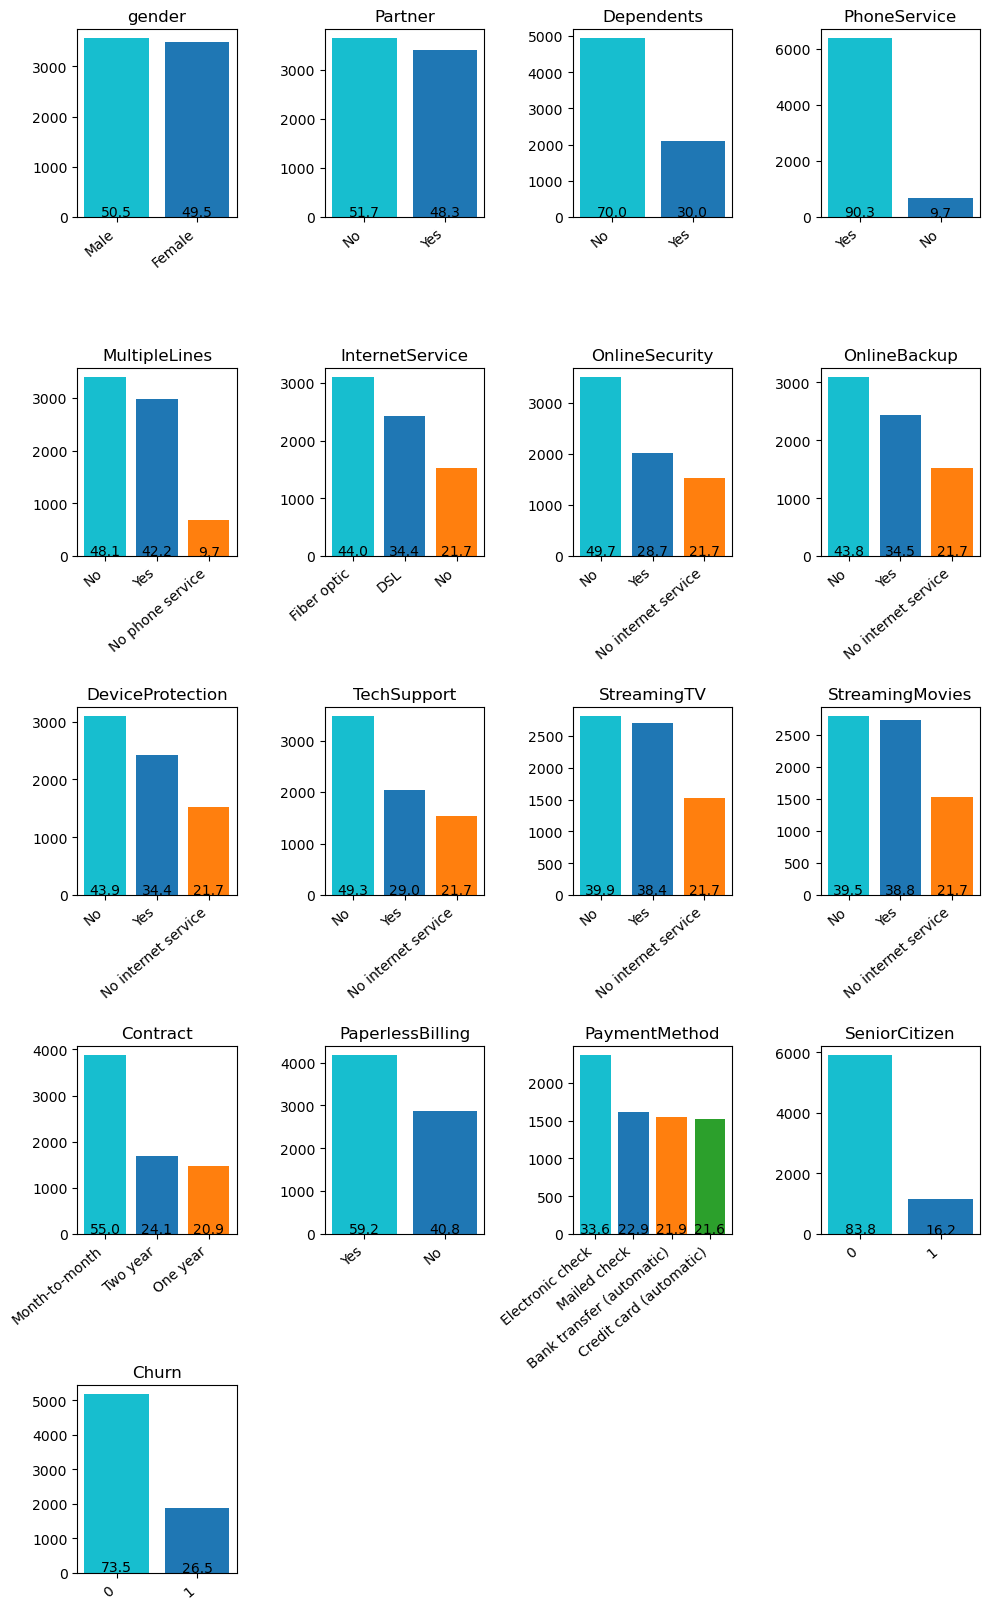

In [9]:
# Kategorik değişkenleri analiz edelim;

et.cat_summary_enhanced(df, cat_cols, figsize=(10,60), plot=True, display_=True)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
tenure,7043.000,32.371,24.559,0.000,1.000,1.000,2.000,9.000,29.000,55.000,69.000,72.000,72.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,19.200,19.650,20.050,35.500,70.350,89.850,102.600,107.400,114.729,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,19.900,49.605,84.600,401.450,1397.475,3794.738,5976.640,6923.590,8039.883,8684.800


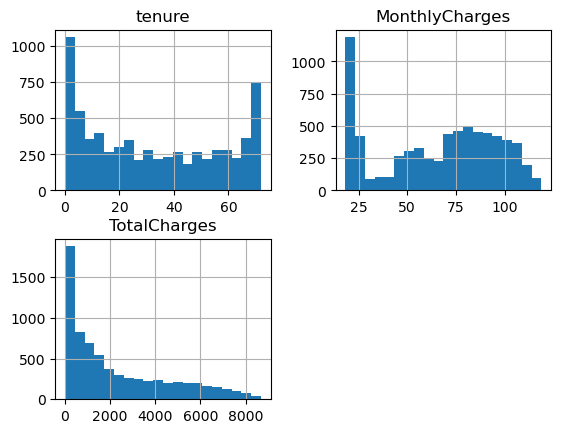

In [10]:
# Numerik değişkenleri analiz edelim;

et.num_summary(df, num_cols, plot=True, display_=True)

In [11]:
# Numerik değişkenlerin target kırılımında analiz edelim;

for col in num_cols:
    et.target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




        TARGET_MEAN
gender             
Female        0.269
Male          0.262


         TARGET_MEAN
Partner             
No             0.330
Yes            0.197


            TARGET_MEAN
Dependents             
No                0.313
Yes               0.155


              TARGET_MEAN
PhoneService             
Yes                 0.267
No                  0.249


                  TARGET_MEAN
MultipleLines                
Yes                     0.286
No                      0.250
No phone service        0.249


                 TARGET_MEAN
InternetService             
Fiber optic            0.419
DSL                    0.190
No                     0.074


                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
Yes                        0.146
No internet service        0.074


                     TARGET_MEAN
OnlineBackup                    
No                         0.399
Yes                        0.215
No internet service        0.0

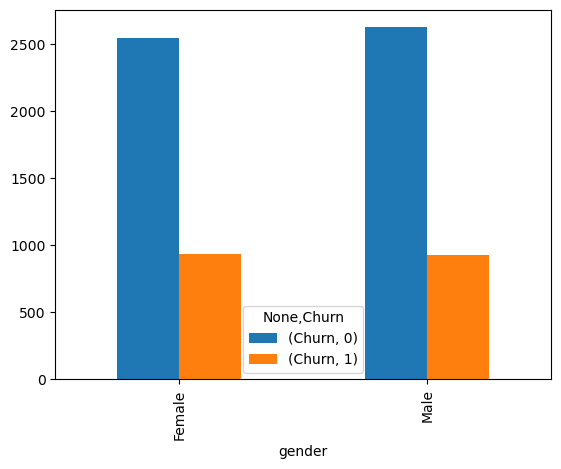

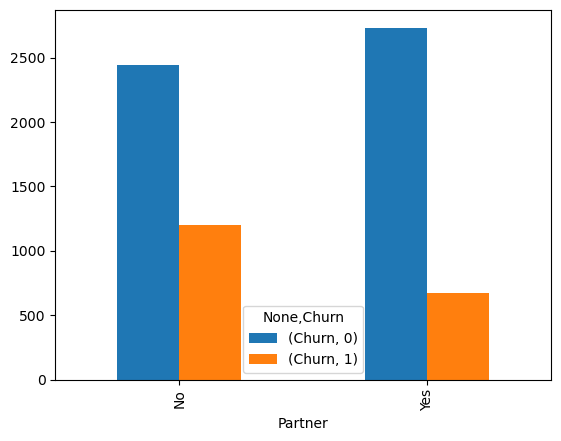

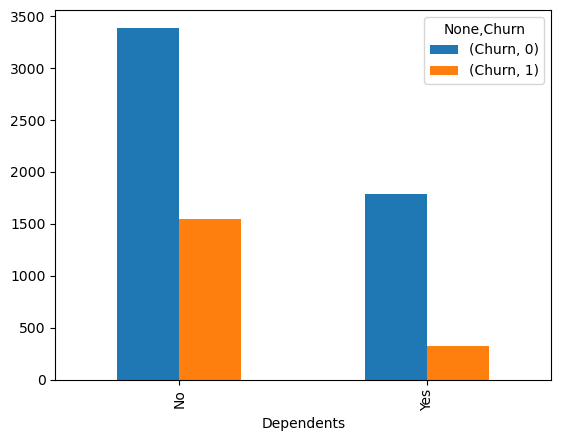

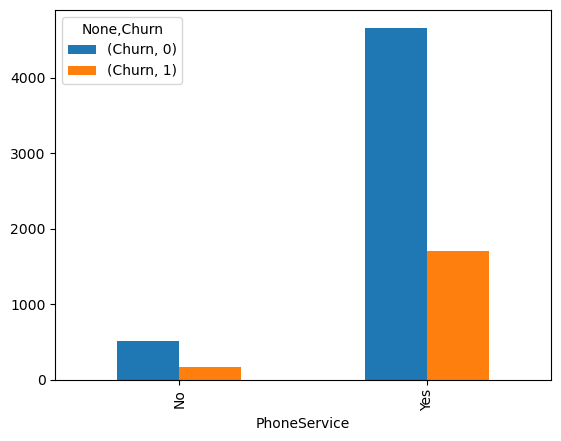

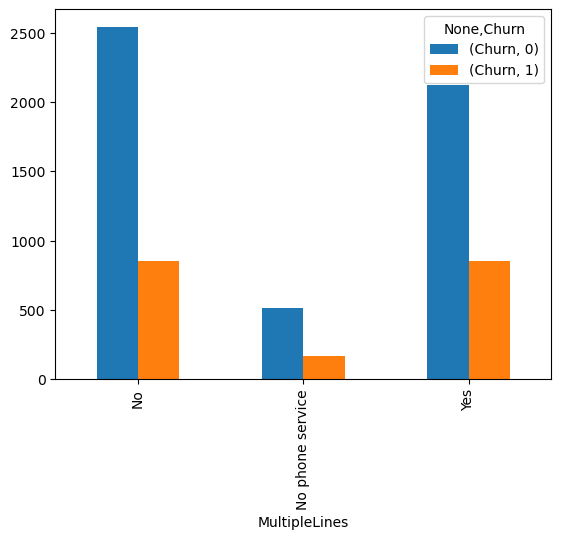

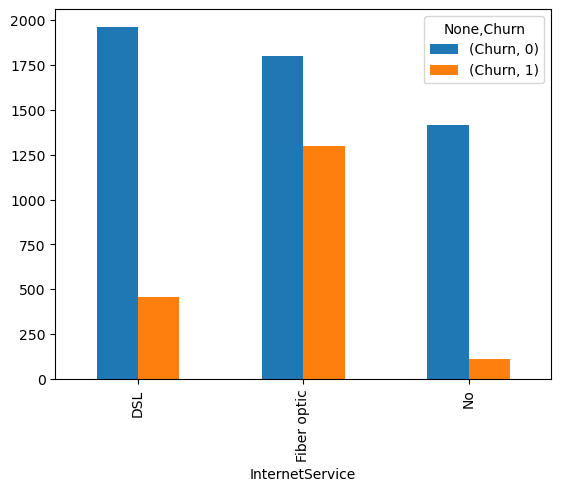

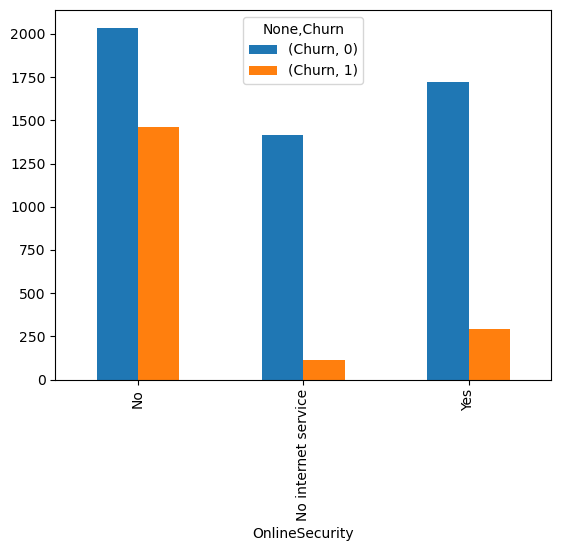

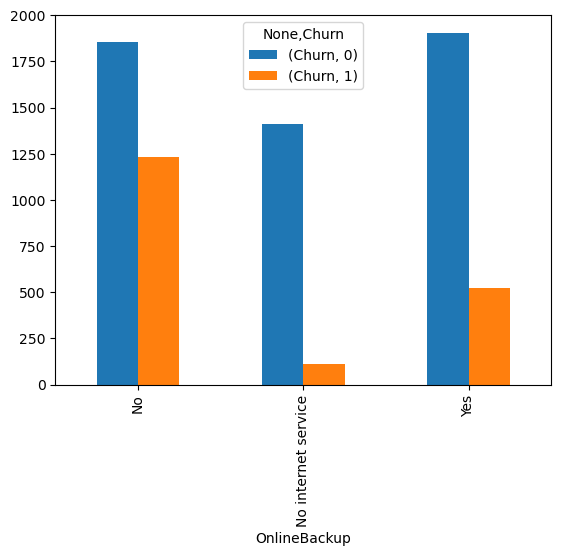

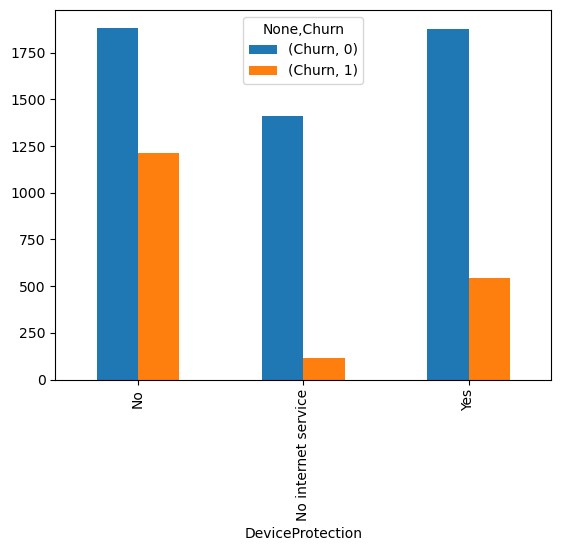

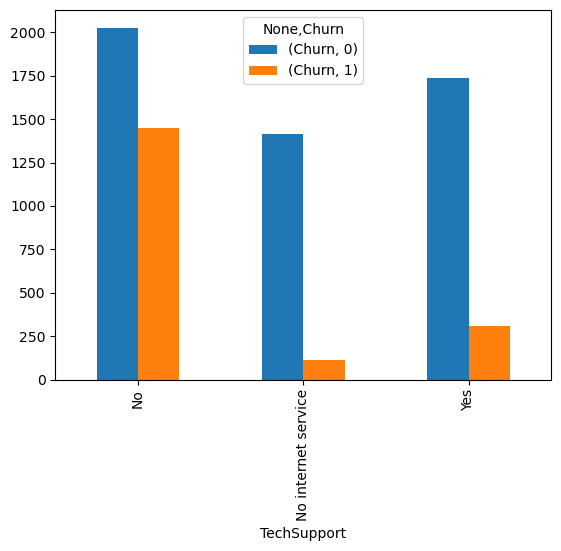

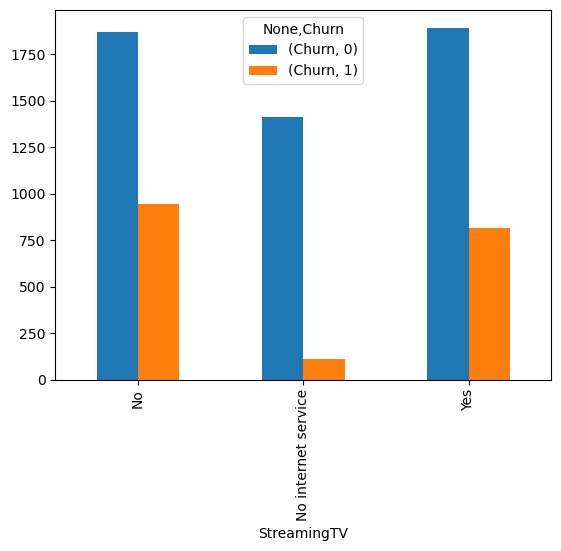

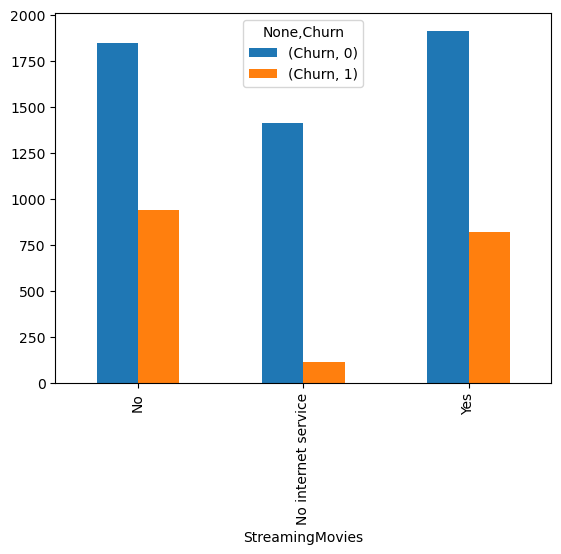

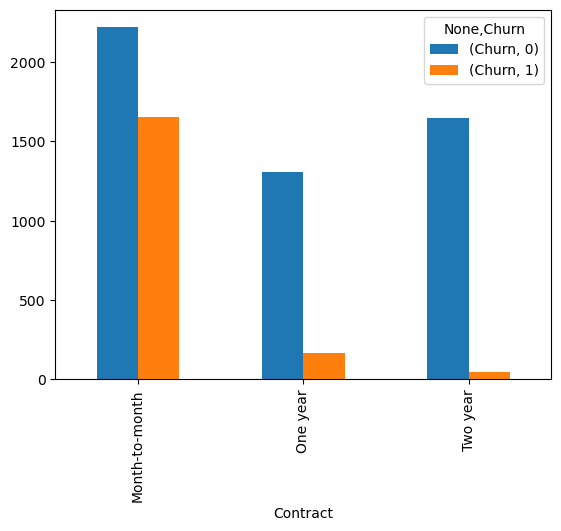

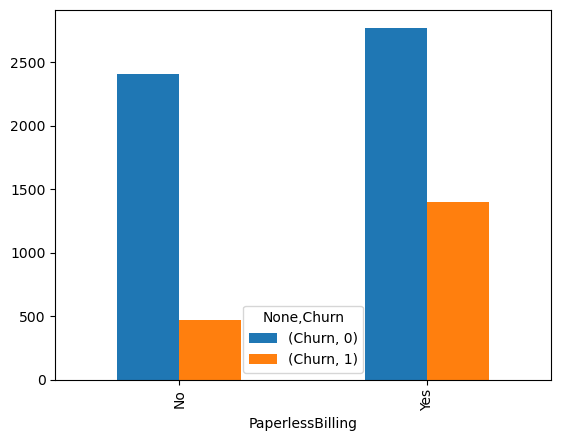

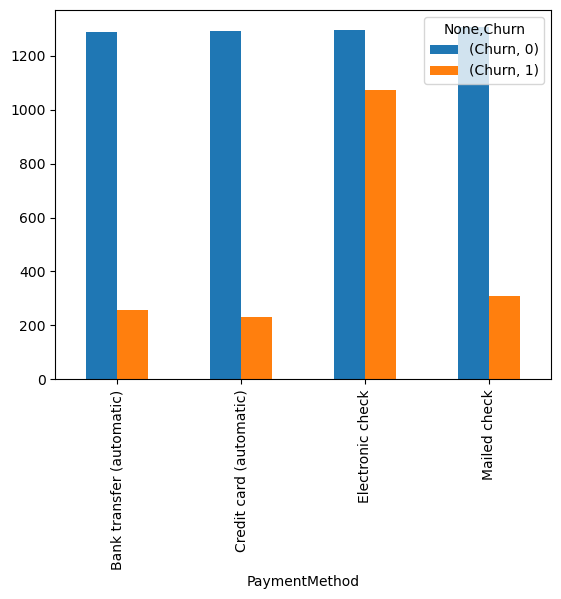

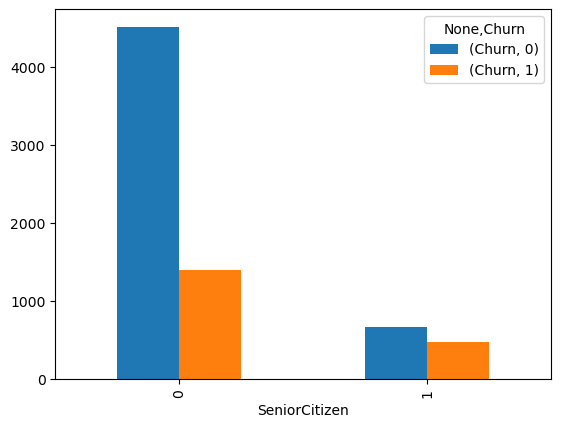

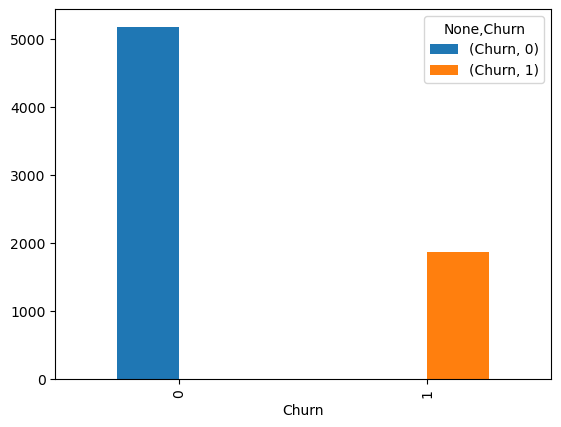

In [12]:
# Kategorik değişkenlerin target kırılımında analiz edelim;

for col in cat_cols:
    et.target_summary_with_cat(df, "Churn", col, plot=True)

In [13]:
# Korelasyonu inceleyelim;

df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


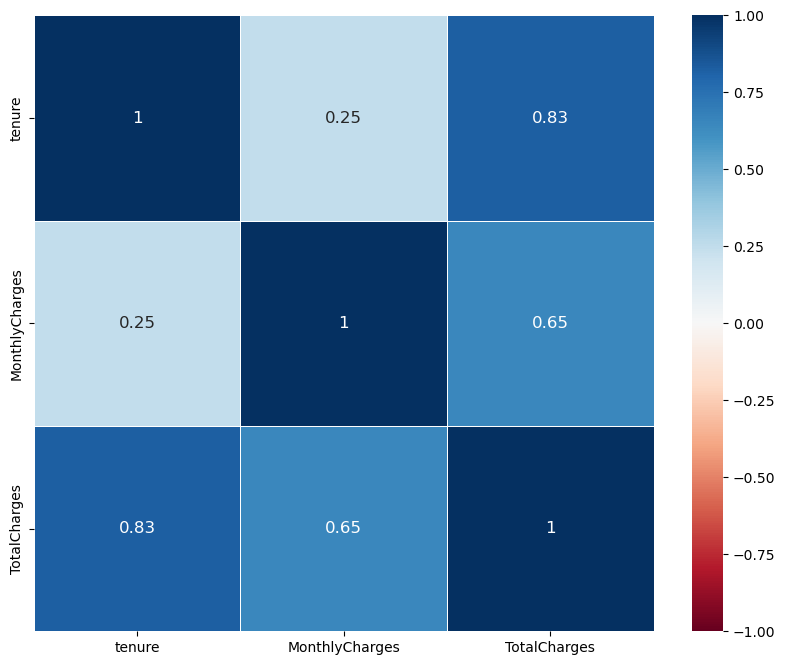

In [14]:
et.correlation_matrix(df, num_cols)

    TotalCharges ile MonthlyCharges arasında yüksek korelasyon var, zzten böyle olmasını bekleriz.

In [15]:
# df'in churn ile korelasyonuna bakalım;

df.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.352
dtype: float64

### Görev 2:

In [16]:
# Eksik değer analizi;
df.isnull().sum()

# Yukarıdaki fonksiyonda "TotalCharges"da null değer bulamamsının sebebi, değişkenin numerik olarak tanımlanmamasıdır.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
# Hangi değişkende kaç adet eksik gözlem ve eksik gözlemlerin yüzdelerini görelim;
na_columns = et.missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


In [18]:
# Eksik Değerleri median ile dolduralım;
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Eksik değer kalmış mı kontrol edelim;
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# Aykırı Değer var mı bakalım;
for col in num_cols:
    print(col, et.check_outlier(df, col))

# Yokmuş

tenure False
MonthlyCharges False
TotalCharges False


In [20]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [21]:
# Veri üzerinde hiçbir feature engineering faaliyetinde bulunmadan base bir model kurup, modeli değerlendirelim;

# Orijinal veriyi kaybetmemek için bir kopyasını alalım;
dff = df.copy()

# Kategorik değişkenler içerisinden churn'ü çıkaralım;
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

# Kategorik değişkenleri one_hot encode edelim;
dff = et.one_hot_encoder(dff, cat_cols, drop_first=True)
dff



,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.950,1889.500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.850,108.150,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,45,42.300,1840.750,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.700,151.650,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.800,1990.500,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,72,103.200,7362.900,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,11,29.600,346.450,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,74.400,306.600,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [23]:
# Bağımlı ve bağımsız değişkenlerimizi belirleyelim;

y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

# Verimizi train ve test olarak ikiye ayıralım;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [24]:
# Model nesnemizi çağırıp, train veri setini fit edelim;
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

# Train edilmiş model üzerinden, test veri setini tahmin edelim;
y_pred = catboost_model.predict(X_test)

In [25]:
# Model değerlendirme metriklerimizi çağıralım;

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.7847
Recall: 0.6331
Precision: 0.493
F1: 0.5544
Auc: 0.7292


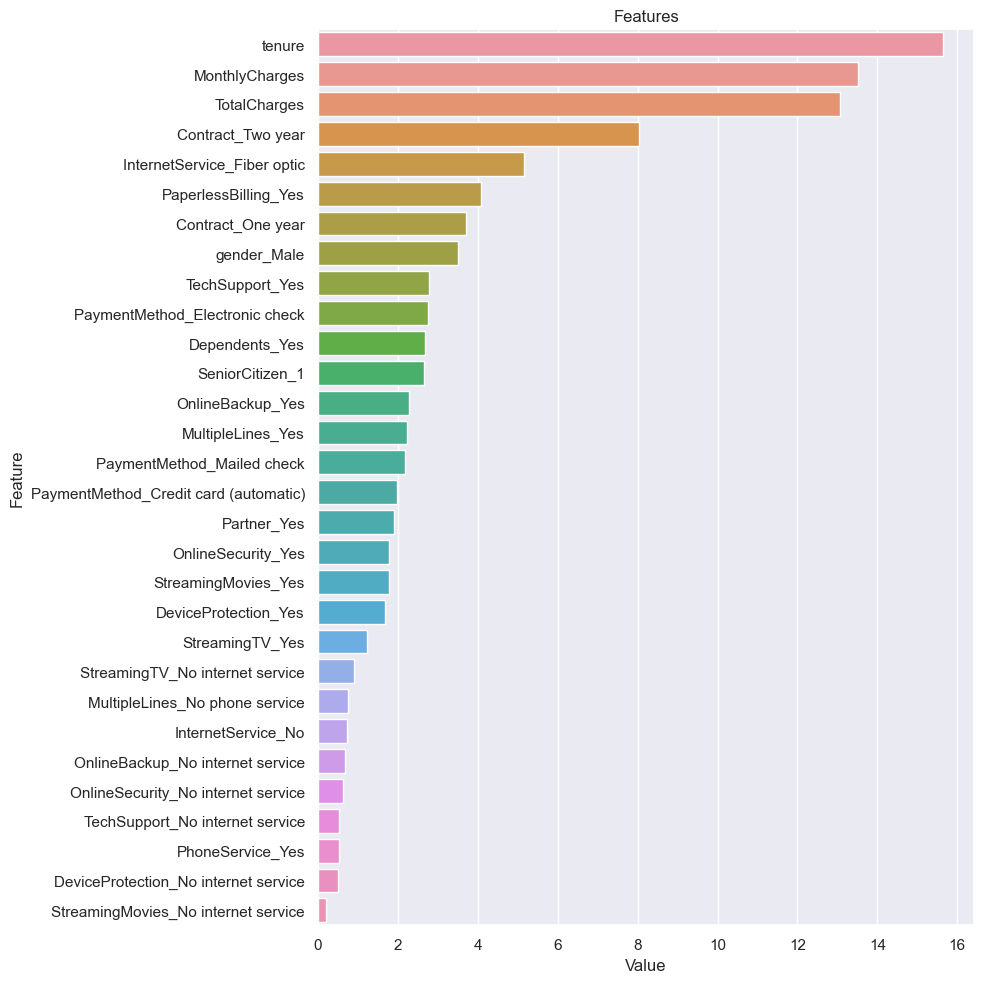

In [26]:
et.plot_importance(catboost_model, X, num=len(X))

    Yukarıdaki görselden anlıyoruz ki, modelimiz en önemli özellik olarak "tenure"u seçmiş ve ardından "MonthlyCharges", "TotalCharges" ve "Contract_Two year" gelmiştir.

### Görev 2:

In [31]:
# Feature Engineering

# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
# Çünkü 1 yıllık taahüt vermişler
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or 
                                           (x["DeviceProtection"] != "Yes") or 
                                           (x["TechSupport"] != "Yes") else 0, axis=1)

# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[[ 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or 
                                                       (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"]. \
    apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [32]:
# Verimize hızlı bir bakış atalım;
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,50.550,0.715,35.350


In [33]:
# Verinin shape'sine bakalım;
df.shape

(7043, 30)

In [34]:
# Encoding

# Bir çok feature ürettiğimiz için değişkenlerimizi yeniden inceleyelim;

cat_cols, num_cols, cat_but_car, num_but_cat = et.grab_col_names(df, var_name=True, var_num=True)

Observations: 7043
Variables: 30
cat_cols: 23
num_cols: 6
cat_but_car: 1
num_but_cat: 7


########## cat_cols ##########
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'NEW_TENURE_YEAR', 'SeniorCitizen', 'Churn', 'NEW_Engaged', 'NEW_noProt', 'NEW_TotalServices', 'NEW_FLAG_ANY_STREAMING', 'NEW_FLAG_AutoPayment']
########## num_cols ##########
['tenure', 'MonthlyCharges', 'TotalCharges', 'NEW_AVG_Charges', 'NEW_Increase', 'NEW_AVG_Service_Fee']
########## cat_but_car ##########
['customerID']
########## num_but_cat ##########
['SeniorCitizen', 'Churn', 'NEW_Engaged', 'NEW_noProt', 'NEW_TotalServices', 'NEW_FLAG_ANY_STREAMING', 'NEW_FLAG_AutoPayment']




In [35]:
# Artık değişkenlerimizi encode edeceğiz, binary değişkenleri yakalayalım ilk önce;

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [36]:
# Bu değişkenleri encode edelim;
for col in binary_cols:
    df = et.label_encoder(df, col)

In [39]:
# One-Hot Encoding İşlemi

# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [40]:
# Bu değişkeneleri one_hot encode edelim;
df = et.one_hot_encoder(df, cat_cols, drop_first=True)

# Verimize hızlı bir bakış atalım;
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,0.500,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,0.669,13.463,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,0.715,35.350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Model kurma vakti;

# Bağımlı ve bağımsız değişkenlerimizi tanımlayalım;
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

# Verimizi test ve train olmak üzere ikiye bölelim;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Model nesnemizi çağıralım ve train verisini fit edelim;
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

# Test verisi üzerinden tahminde bulunalım;
y_pred = catboost_model.predict(X_test)

In [42]:
# Başarı metriklerini çağıralım;
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.8
Recall: 0.66
Precision: 0.51
F1: 0.57
Auc: 0.75


In [43]:
# Base modeldeki başarı metriklerimiz aşağıdadır;
# Çabalarımız sonuç vermiş gibi gözüküyor. :)

# Base Model
# # Accuracy: 0.7837
# # Recall: 0.6333
# # Precision: 0.4843
# # F1: 0.5489
# # Auc: 0.7282

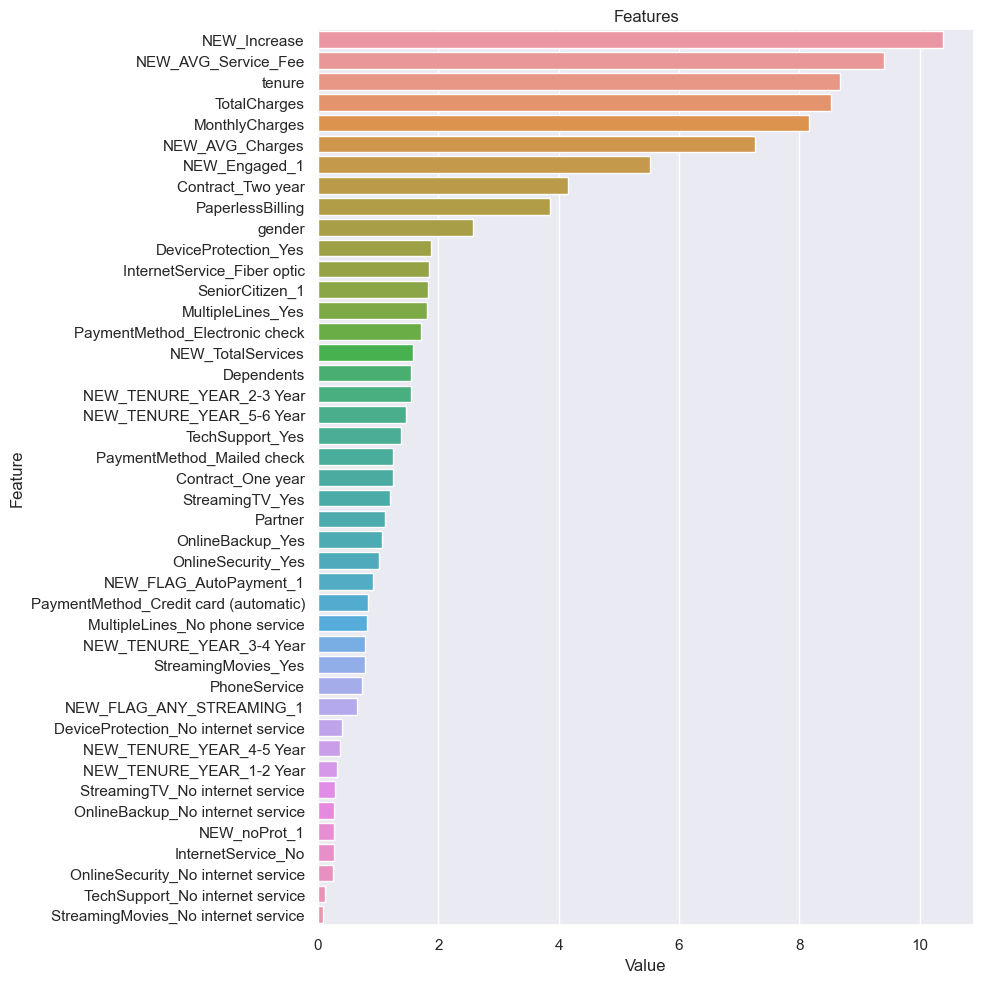

In [44]:
# Özellik önemlerine bakalım;

et.plot_importance(catboost_model, X, num=len(X))

    Oluşturduğumuz NEW_Increase VE NEW_AVG_Service_Fee modelimiz için önemli özellikler haline gelmiş :)